In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
spot_api = ''
spot_secret = ''

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
color_list = ['#4a89dc', 
              '#8cc152', 
              '#da4453', 
              '#f6bb42', 
              '#d770ad', 
              '#37bc9b', 
              '#a8620c', 
              '#e9573f', 
              '#3bafda', 
              '#967adc', 
              
              #gray
              '#656d78']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_list) 

In [6]:
#fix so that it reads in dates as datetime, not as string
df1 = pd.read_json('MyData/StreamingHistory0.json')
df2 = pd.read_json('MyData/StreamingHistory1.json')

df = pd.concat([df1, df2])
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df['endTime'] = pd.to_datetime(df['endTime'])
df['endTime'] = df['endTime'].apply(lambda x: (x - dt.timedelta(hours=6))) #adjust for being GMT -6 (central)
df['year'] = df['endTime'].dt.year
df['month'] = df['endTime'].dt.month
df['hour'] = df['endTime'].dt.hour

In [7]:
df.head()

,endTime,artistName,trackName,msPlayed,year,month,hour
0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19
1,2019-10-10 19:07:00,The Geek x Vrv,Royale with G'S 2013,197277,2019,10,19
2,2019-10-10 19:07:00,Big Wild,6's to 9's - Analog Sessions,6455,2019,10,19
3,2019-10-10 19:09:00,"Tyler, The Creator",EARFQUAKE - Channel Tres Remix,142570,2019,10,19
4,2019-10-10 19:14:00,Big Gigantic,Where I Wanna Be,266634,2019,10,19


In [8]:
df['SongArtist'] = df['trackName'] + ' ... ' + df['artistName']
df.head()

,endTime,artistName,trackName,msPlayed,year,month,hour,SongArtist
0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19,Room to Breathe ... CharlestheFirst
1,2019-10-10 19:07:00,The Geek x Vrv,Royale with G'S 2013,197277,2019,10,19,Royale with G'S 2013 ... The Geek x Vrv
2,2019-10-10 19:07:00,Big Wild,6's to 9's - Analog Sessions,6455,2019,10,19,6's to 9's - Analog Sessions ... Big Wild
3,2019-10-10 19:09:00,"Tyler, The Creator",EARFQUAKE - Channel Tres Remix,142570,2019,10,19,"EARFQUAKE - Channel Tres Remix ... Tyler, The ..."
4,2019-10-10 19:14:00,Big Gigantic,Where I Wanna Be,266634,2019,10,19,Where I Wanna Be ... Big Gigantic


In [9]:
#get rid of Joe Rogan Podcast
df = df[df['artistName']!='The Joe Rogan Experience']

#get rid of 'Unknown Artist'
df = df[df['artistName']!='Unknown Artist']

In [10]:
#graph of top artists played by msPlayed
data = []
for artist in df['artistName'].unique():
    df_temp = df[df['artistName']==artist]
    total_ms = sum(df_temp['msPlayed'])
    data.append([artist, total_ms, df_temp['artistName'].count()])
top_artist = pd.DataFrame(data, columns = ['Artist', 'Total Milliseconds', 'Total Plays'])
top_artist.head()

,Artist,Total Milliseconds,Total Plays
0,CharlestheFirst,3904453,29
1,The Geek x Vrv,3457766,30
2,Big Wild,6757324,45
3,"Tyler, The Creator",6256107,52
4,Big Gigantic,2609741,19


In [11]:
top_artist = top_artist.sort_values(by='Total Milliseconds', ascending=False)
top_artist = top_artist.reset_index(drop=True)
top_artist.head(10)

,Artist,Total Milliseconds,Total Plays
0,Pretty Lights,95121758,439
1,Grateful Dead,83428872,403
2,Tame Impala,52584290,274
3,Mac Miller,45009732,248
4,Steely Dan,42242225,200
5,GRiZ,36110545,267
6,ODESZA,27030997,196
7,Late Night Radio,25274577,182
8,Kanye West,25131243,160
9,Eagles,24446137,135


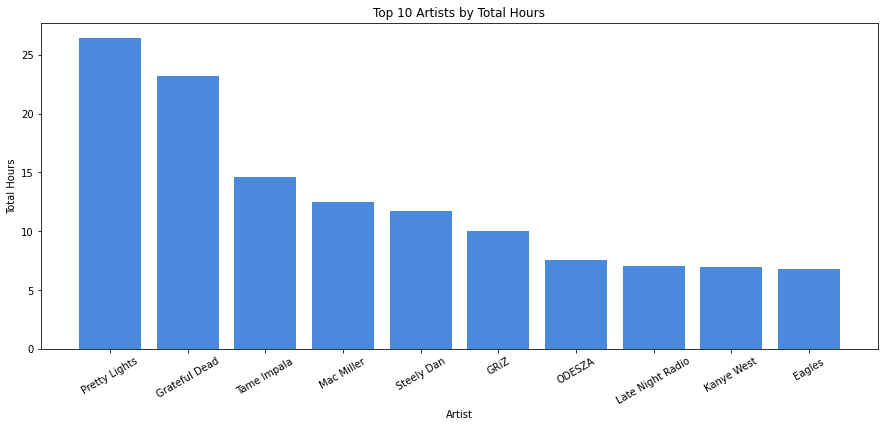

In [12]:
top = 10

x_val = np.arange(top)
plt.bar(x=x_val, 
        height=top_artist['Total Milliseconds'][:top]/(1000*60*60))

#formatting
plt.xticks(x_val, top_artist['Artist'][:top].values, rotation=30)
plt.ylabel('Total Hours')
plt.xlabel('Artist')
plt.title('Top '+str(top)+' Artists by Total Hours')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

In [13]:
#graph of top songs played by msPlayed
data = []
for song in df['SongArtist'].unique():
    df_temp = df[df['SongArtist']==song]
#     track = df_temp['trackName'].values[0]
    total_ms = sum(df_temp['msPlayed'])
    data.append([song, total_ms, df_temp['SongArtist'].count()])
top_song = pd.DataFrame(data, columns = ['SongArtist', 'Total Milliseconds', 'Total Plays'])
top_song = top_song.sort_values(by='Total Milliseconds', ascending=False)
top_song.head(10)

,SongArtist,Total Milliseconds,Total Plays
59,Listen to the Music ... The Doobie Brothers,9943603,57
3444,Move on Up ... The Dynamics,9178160,27
40,Solamente ... Pretty Lights,8546834,28
395,Blue Sky ... Allman Brothers Band,8328108,30
406,Patience ... Tame Impala,8284138,38
416,Suite: Judy Blue Eyes - 2005 Remaster ... Cros...,7956476,23
918,Chill Study Beats 6 (Full Mix) - Chillhop Mix ...,7643389,2
412,Ramblin' Man ... Allman Brothers Band,7532385,31
3307,Atomic Bomb ... William Onyeabor,7399413,31
64,This Must Be the Place (Naive Melody) - 2005 R...,7302576,32


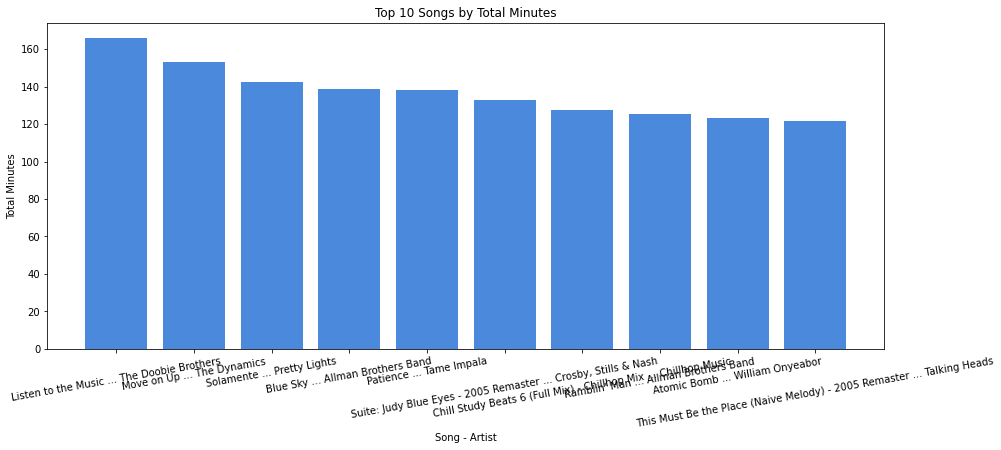

In [14]:
top = 10

x_val = np.arange(top)
plt.bar(x=x_val, 
        height=top_song['Total Milliseconds'][:top]/(1000*60))

#formatting
plt.xticks(x_val, top_song['SongArtist'][:top].values, rotation=10)
plt.ylabel('Total Minutes')
plt.xlabel('Song - Artist')
plt.title('Top '+str(top)+' Songs by Total Minutes')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

## Month of the Year

In [15]:
#graph of top artists played by msPlayed
data = []
for month in df['month'].unique():
    df_temp = df[df['month']==month]
    total_ms = sum(df_temp['msPlayed'])
    data.append([month, total_ms, df_temp['month'].count()])
top_month = pd.DataFrame(data, columns = ['Month of the Day', 'Total Milliseconds', 'Total Plays'])
top_month = top_month.sort_values(by='Month of the Day')
top_month.head()

,Month of the Day,Total Milliseconds,Total Plays
3,1,273609522,1696
4,2,196056801,1185
5,3,314413476,1999
6,4,285847211,1544
7,5,251783502,1342


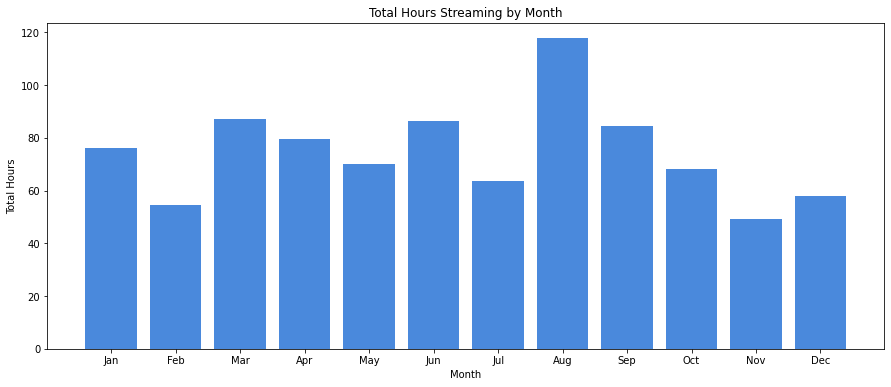

In [16]:
x_val = np.arange(1,13)
plt.bar(x=x_val, 
        height=top_month['Total Milliseconds']/(1000*60*60))

month_vals = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#formatting
plt.xticks(x_val, month_vals)
plt.ylabel('Total Hours')
plt.xlabel('Month')
plt.title('Total Hours Streaming by Month')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

## Hour of the Day

In [17]:
#graph of top artists played by msPlayed
data = []
for hour in df['hour'].unique():
    df_temp = df[df['hour']==hour]
    total_ms = sum(df_temp['msPlayed'])
    data.append([hour, total_ms, df_temp['hour'].count()])
top_hour = pd.DataFrame(data, columns = ['Hour of the Day', 'Total Milliseconds', 'Total Plays'])
top_hour = top_hour.sort_values(by='Hour of the Day')
top_hour.head()

,Hour of the Day,Total Milliseconds,Total Plays
14,0,76961135,367
18,1,40426638,194
20,2,28190662,136
22,3,19648627,84
23,4,5213516,19


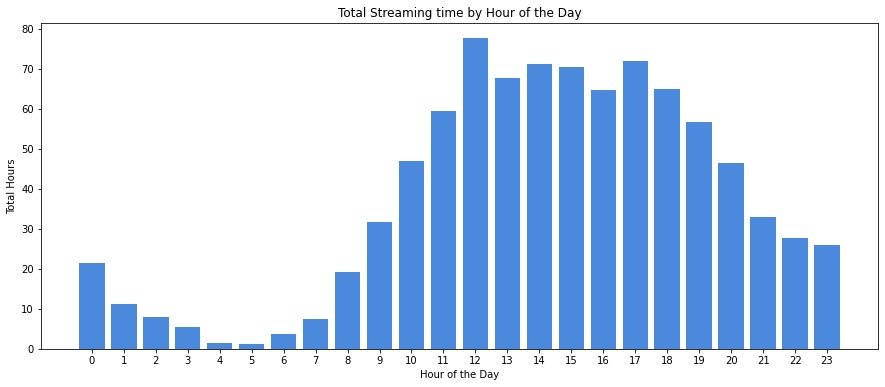

In [18]:
x_val = np.arange(24)
plt.bar(x=x_val, 
        height=top_hour['Total Milliseconds']/(1000*60*60))

#formatting
plt.xticks(x_val, top_hour['Hour of the Day'].values)
plt.ylabel('Total Hours')
plt.xlabel('Hour of the Day')
plt.title('Total Streaming time by Hour of the Day')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

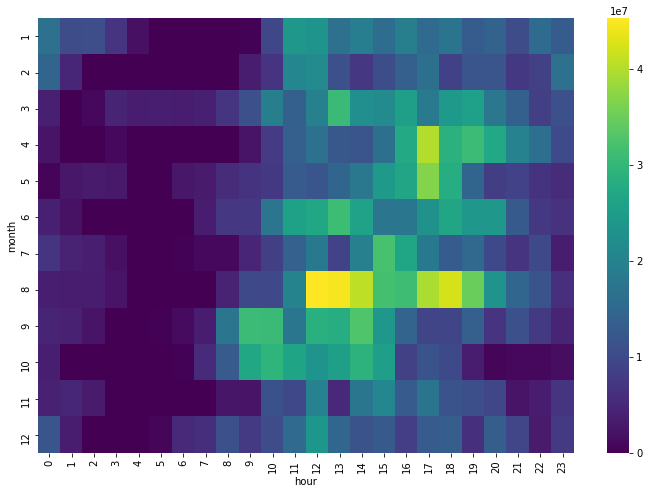

In [19]:
timetable = df.pivot_table(index='month', columns='hour', values='msPlayed', aggfunc=np.sum)
timetable = timetable.fillna(0)
sns.heatmap(timetable, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(12,8)

In [20]:
#even buckets (groups of 4 or 6 hours)

##categorize
# 6-12 = morning
# 12-4 = afternoon
# 4-7 = evening
# 7-10 = night
# 10-6 = late night
def func(x):
    if(x >= 6 and x < 12): return 'Morning'
    elif(x >= 12 and x < 16): return 'Afternoon'
    elif(x >= 16 and x < 19): return 'Evening'
    elif(x >= 19 and x < 22): return 'Night'
    elif(x >= 22 or x < 6): return 'Late Night'

df['Part of Day'] = df['hour'].apply(func)
df.head()

,endTime,artistName,trackName,msPlayed,year,month,hour,SongArtist,Part of Day
0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19,Room to Breathe ... CharlestheFirst,Night
1,2019-10-10 19:07:00,The Geek x Vrv,Royale with G'S 2013,197277,2019,10,19,Royale with G'S 2013 ... The Geek x Vrv,Night
2,2019-10-10 19:07:00,Big Wild,6's to 9's - Analog Sessions,6455,2019,10,19,6's to 9's - Analog Sessions ... Big Wild,Night
3,2019-10-10 19:09:00,"Tyler, The Creator",EARFQUAKE - Channel Tres Remix,142570,2019,10,19,"EARFQUAKE - Channel Tres Remix ... Tyler, The ...",Night
4,2019-10-10 19:14:00,Big Gigantic,Where I Wanna Be,266634,2019,10,19,Where I Wanna Be ... Big Gigantic,Night


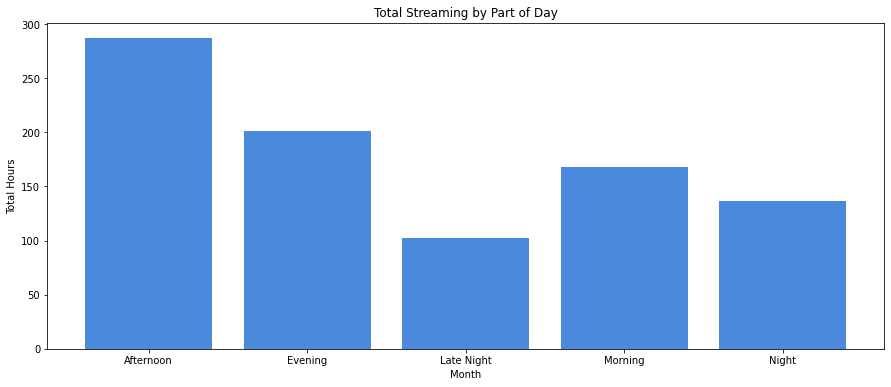

In [21]:
###table
data = []
for part in df['Part of Day'].unique():
    df_temp = df[df['Part of Day']==part]
    total_ms = sum(df_temp['msPlayed'])
    data.append([part, total_ms, df_temp['Part of Day'].count()])
top_part = pd.DataFrame(data, columns = ['Part of Day', 'Total Milliseconds', 'Total Plays'])
top_part = top_part.sort_values(by='Part of Day')
top_part.head()

# ###
x_val = np.arange(len(top_part['Part of Day'].unique()))
plt.bar(x=x_val, 
        height=top_part['Total Milliseconds']/(1000*60*60))

# # month_vals = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# #formatting
plt.xticks(x_val, top_part['Part of Day'].unique())
plt.ylabel('Total Hours')
plt.xlabel('Month')
plt.title('Total Streaming by Part of Day')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

## Top Artist

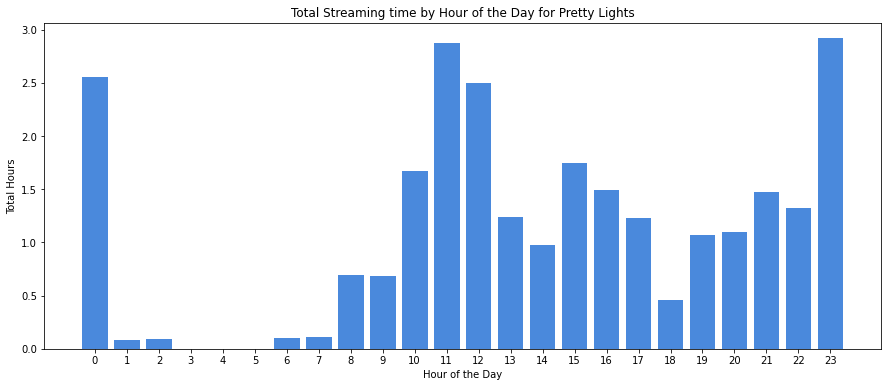

In [22]:
artist = top_artist['Artist'][0] #grab the highest played artist

df_artist = df[df['artistName']==artist]

###creating table###
data = []
x_val = np.arange(24)
for hour in x_val:
    df_temp = df_artist[df_artist['hour']==hour]
    total_ms = sum(df_temp['msPlayed'])
    data.append([hour, total_ms, df_temp['hour'].count()])
top_hour = pd.DataFrame(data, columns = ['Hour of the Day', 'Total Milliseconds', 'Total Plays'])
top_hour = top_hour.sort_values(by='Hour of the Day')

###graphing###
plt.bar(x=x_val, height=top_hour['Total Milliseconds']/(1000*60*60))

###formatting###
plt.xticks(x_val, top_hour['Hour of the Day'].values)
plt.ylabel('Total Hours')
plt.xlabel('Hour of the Day')
plt.title('Total Streaming time by Hour of the Day for '+artist)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

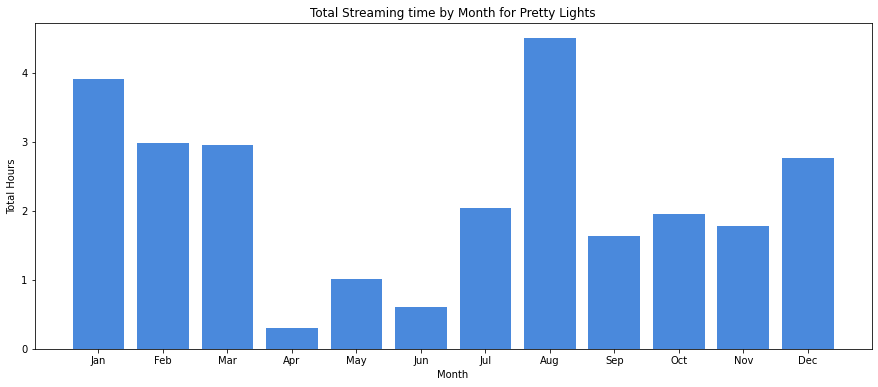

In [23]:
###creating table###
data = []
x_val = np.arange(1,13)
for month in x_val:
    df_temp = df_artist[df_artist['month']==month]
    total_ms = sum(df_temp['msPlayed'])
    data.append([month, total_ms, df_temp['month'].count()])
top_month = pd.DataFrame(data, columns = ['Month of the Day', 'Total Milliseconds', 'Total Plays'])
top_month = top_month.sort_values(by='Month of the Day')

###graphing###
plt.bar(x=x_val, height=top_month['Total Milliseconds']/(1000*60*60))

###formatting###
plt.xticks(x_val, month_vals)
plt.ylabel('Total Hours')
plt.xlabel('Month')
plt.title('Total Streaming time by Month for '+artist)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

In [24]:
#top songs for select artist
top = 10

df_artist.head()
# song_list = df_artist['trackName'].unique()
song_list = pd.DataFrame(df_artist.groupby('trackName').msPlayed.sum())
song_list = song_list.sort_values(by='msPlayed', ascending=False)
song_list['%'] = song_list['msPlayed']/sum(song_list['msPlayed'])
song_list.head(10)

,msPlayed,%
trackName,,
Solamente,8546834,0.089852
Fill Your Eyes,5265154,0.055352
Only Yesterday,4628719,0.048661
Something's Wrong,4193500,0.044086
Evening Sun,4125022,0.043366
Finally Moving,3869365,0.040678
Let The World Hurry By,3652492,0.038398
The Time Has Come,3554768,0.037371
Stay,3381708,0.035551


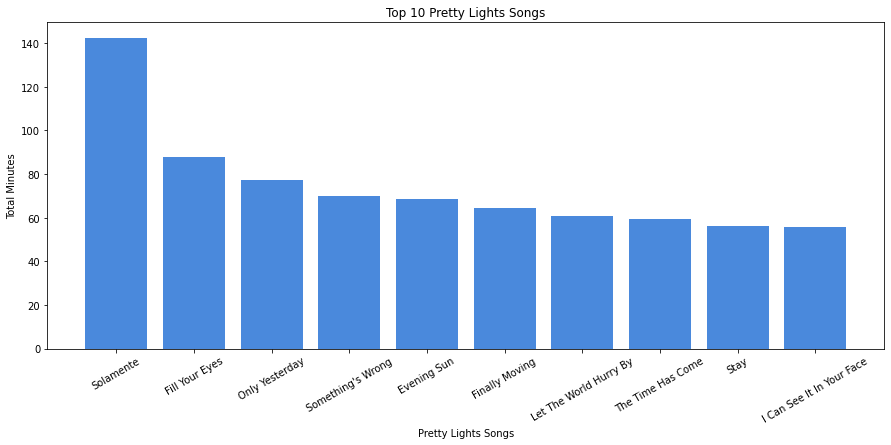

In [25]:
top = 10

x_val = np.arange(top)
plt.bar(x=x_val, 
        height=song_list['msPlayed'][:top]/(1000*60))

#formatting
plt.xticks(x_val, song_list[:top].index, rotation=30)
plt.ylabel('Total Minutes')
plt.xlabel(artist + ' Songs')
plt.title('Top '+str(top)+' '+artist+' Songs')
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

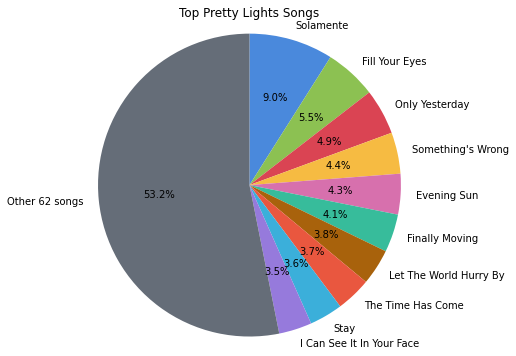

[8546834, 5265154, 4628719, 4193500, 4125022, 3869365, 3652492, 3554768, 3381708, 3346315, 50557881]


In [26]:
#pie chart
top=10

values = song_list['msPlayed'][:top].tolist()
labels = song_list[:top].index.tolist()
rest = sum(song_list['msPlayed'][top:])
count = song_list[top:].count(axis = 0)[1]
values.append(rest)
labels.append('Other '+str(count)+' songs')

plt.pie(values, labels=labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top '+artist+' Songs')

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(values)

In [29]:
!pip install spotipy --upgrade

Requirement already up-to-date: spotipy in /Users/carter.pace/opt/anaconda3/lib/python3.8/site-packages (2.18.0)


In [31]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data

client_id = '5a3e7e18f15d48ffb01fc931bb03a85f'     #fill these with spotify id
client_secret = '103cd55f66bd40e79cca9837c3d294e3' #fill these with spotify secret

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [32]:
name = 'GRiZ'

result = sp.search(name) #search query
# result['tracks']['items'][0]['artists']
# result['tracks'].keys()

#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']

#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')

#Store artist's albums' names' and uris in separate lists
album_uris = []
album_names = []
for i in range(len(sp_albums['items'])):
    album_uris.append(sp_albums['items'][i]['uri'])
    album_names.append(sp_albums['items'][i]['name'])
    
album_uris
album_names

['Built For Whatever',
 'Built For Whatever',
 'The Smartest',
 'The Smartest',
 'Scriptures',
 'Scriptures',
 'Still My Moment',
 'Still My Moment',
 'Activated',
 'Activated',
 'Bloodas',
 'My Moment',
 'My Moment']

In [33]:
result = sp.search('Where I Wanna Be ... Big Gigantic')['tracks']['items'][0]

#specs
song_name = result['name']
song_popularity = result['popularity']
song_id = result['uri']
song_length = result['duration_ms']

artist_name = result['artists'][0]['name']
artist_id = result['artists'][0]['uri']

album_name = result['album']['name']
album_id = result['album']['uri']
album_releaseDate = dt.datetime.strptime(result['album']['release_date'], '%Y-%m-%d')

In [303]:
#TODO: sometimes the search doesn't come up with a song? example: "Lucy (feat. Felly) Gyyps"

for index, row in df.iterrows():
    try:
        searchTerm = str(row['trackName']) + ' ' + str(row['artistName'])
#         print(index)
        result = sp.search(searchTerm)['tracks']['items'][0]
        
        df.loc[index, 'trackName'] = result['name']
        df.loc[index, 'Song Length'] = result['duration_ms']
        df.loc[index, 'Song Popularity'] = result['popularity']
        df.loc[index, 'artistName'] = result['artists'][0]['name']
        df.loc[index, 'Album Name'] = result['album']['name']
        df.loc[index, 'Album ReleaseDate'] = result['album']['release_date'] #doesn't always come in YYYY-MM-DD format
        df.loc[index, 'Song ID'] = result['uri']
        df.loc[index, 'Artist ID'] = result['artists'][0]['uri']
        df.loc[index, 'Album ID'] = result['album']['uri']
        
        temp_song = result['uri']
        result2 = sp.audio_features(temp_song)[0]
        
        df.loc[index, 'acousticness'] = result2['acousticness']
        df.loc[index, 'danceability'] = result2['danceability']
        df.loc[index, 'energy'] = result2['energy']
        df.loc[index, 'instrumentalness'] = result2['instrumentalness']
        df.loc[index, 'loudness'] = result2['loudness']
        df.loc[index, 'liveness'] = result2['liveness']
        df.loc[index, 'tempo'] = result2['tempo']
        df.loc[index, 'valence'] = result2['valence']
        
    except:
        #could try removing anything after a special character like '-' or '('
        print('SONG NOT FOUND: '+ searchTerm)
        
df.head()

SONG NOT FOUND: Where Is My Mind FMLYBND
SONG NOT FOUND: Not Going Home (feat. Gia Koka) DVBBS
SONG NOT FOUND: In Bloom Mo Anando
SONG NOT FOUND: Bistro (Intro) Plusma
SONG NOT FOUND: Kakuna glue70
SONG NOT FOUND: A DNA Company Lets the FBI In The Journal.
SONG NOT FOUND: A DNA Company Lets the FBI In The Journal.
SONG NOT FOUND: A DNA Company Lets the FBI In The Journal.
SONG NOT FOUND: Make You Wanna Flap Jack
SONG NOT FOUND: I Wish I Could Sleep Nymano
SONG NOT FOUND: Kakuna glue70
SONG NOT FOUND: Fallback emune
SONG NOT FOUND: Bistro (Intro) Plusma
SONG NOT FOUND: I Wish I Could Sleep Nymano
SONG NOT FOUND: Jam N' Soul Chop Juggler
SONG NOT FOUND: Sangrilune Birocratic
SONG NOT FOUND: Early Morning Sensi Sye
SONG NOT FOUND: Her Smile Brock Berrigan
SONG NOT FOUND: Chill Study Beats 6 (Full Mix) - Chillhop Mix Chillhop Music
SONG NOT FOUND: Come Close Handbook
SONG NOT FOUND: In Bloom Mo Anando
SONG NOT FOUND: Ripple J. Roosevelt
SONG NOT FOUND: Tune In Joseph Jacobs
SONG NOT FOUND:

SONG NOT FOUND: The Wonderer Gasiraljican
SONG NOT FOUND: The Dark Times TheNebitan
SONG NOT FOUND: I'm Down Down Gasiraljican
SONG NOT FOUND: Stuck and Lost Ssstamijeb
SONG NOT FOUND: Stop Judging Lepigancisam
SONG NOT FOUND: Just Honesty Doubiouse
SONG NOT FOUND: Wonders Ssstamijeb
SONG NOT FOUND: Hold Me Please Gasiraljican
SONG NOT FOUND: Days Flowing By Ssstamijeb
SONG NOT FOUND: Stuck and Lost Ssstamijeb
SONG NOT FOUND: Stop Judging Lepigancisam
SONG NOT FOUND: Deep Minds Gasiraljican
SONG NOT FOUND: I'm Stuck Ssstamijeb
SONG NOT FOUND: Losing My Mind Doubiouse
SONG NOT FOUND: Struggling Through Ssstamijeb
SONG NOT FOUND: Roads Munosam
SONG NOT FOUND: Deep Minds Gasiraljican
SONG NOT FOUND: I'm Stuck Ssstamijeb
SONG NOT FOUND: Losing My Mind Doubiouse
SONG NOT FOUND: Struggling Through Ssstamijeb
SONG NOT FOUND: Radio Tunes Yebem Detsu
SONG NOT FOUND: Anxiety Kick Doubiouse
SONG NOT FOUND: Draw the Line Ssstamijeb
SONG NOT FOUND: Mega Boom Lepigancisam
SONG NOT FOUND: Stargaze Ed

,endTime,artistName,trackName,msPlayed,year,month,hour,SongArtist,Song Length,Song Popularity,...,Artist ID,Album ID,acousticness,danceability,energy,instrumentalness,loudness,liveness,tempo,valence
0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19,Room to Breathe ... CharlestheFirst,170909.0,37.0,...,spotify:artist:2FTj5ijy8lP59d2V9dHR6I,spotify:album:5sSo1n6byaLi272WDH0rbU,0.80700,0.742,0.318,0.717000,-12.405,0.1110,132.002,0.105
1,2019-10-10 19:07:00,The Geek x Vrv,Royale with G's 2013,197277,2019,10,19,Royale with G'S 2013 ... The Geek x Vrv,240000.0,26.0,...,spotify:artist:4JhjlqgMbd4RlrT81VoTIF,spotify:album:0FFubmrHvePJdLgvKaVLIq,0.00607,0.658,0.768,0.845000,-5.398,0.0618,173.941,0.497
2,2019-10-10 19:07:00,Big Wild,6's to 9's - Analog Sessions,6455,2019,10,19,6's to 9's - Analog Sessions ... Big Wild,214374.0,48.0,...,spotify:artist:0PxzGnCYBpSuaI49OR94cA,spotify:album:1apJpjO4P4jK0pdhRVvpQx,0.76200,0.720,0.397,0.000010,-6.975,0.0905,95.935,0.174
3,2019-10-10 19:09:00,"Tyler, The Creator",EARFQUAKE - Channel Tres Remix,142570,2019,10,19,"EARFQUAKE - Channel Tres Remix ... Tyler, The ...",228250.0,52.0,...,spotify:artist:4V8LLVI7PbaPR0K2TGSxFF,spotify:album:2gIJO0RLORaeRCT9G1E52V,0.02060,0.698,0.690,0.560000,-8.705,0.1950,119.998,0.468
4,2019-10-10 19:14:00,Big Gigantic,Where I Wanna Be,266634,2019,10,19,Where I Wanna Be ... Big Gigantic,266634.0,34.0,...,spotify:artist:7o7mC95EDbJKTcPAAs8C3r,spotify:album:5X8lYBkuMoxEKMDFVMYZBB,0.11300,0.576,0.912,0.000136,-2.782,0.2020,74.980,0.393


In [305]:
# df.to_excel("output.xlsx")

In [34]:
df = pd.read_excel('output.xlsx')
df.head()

,ID,endTime,artistName,trackName,msPlayed,year,month,hour,SongArtist,Song Length,Song Popularity,Album Name,Album ReleaseDate,Song ID,Artist ID,Album ID
0,0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19,Room to Breathe ... CharlestheFirst,170909.0,37.0,Room to Breathe,2019-10-01,spotify:track:7vMKyxhiJ1cQcoVHcU2rpv,spotify:artist:2FTj5ijy8lP59d2V9dHR6I,spotify:album:5sSo1n6byaLi272WDH0rbU
1,1,2019-10-10 19:07:00,The Geek x Vrv,Royale with G's 2013,197277,2019,10,19,Royale with G'S 2013 ... The Geek x Vrv,240000.0,26.0,Time Machine,2020-01-24,spotify:track:596UhuVARfyxnFWdYKU1Kf,spotify:artist:4JhjlqgMbd4RlrT81VoTIF,spotify:album:0FFubmrHvePJdLgvKaVLIq
2,2,2019-10-10 19:07:00,Big Wild,6's to 9's - Analog Sessions,6455,2019,10,19,6's to 9's - Analog Sessions ... Big Wild,214374.0,48.0,Superdream: Analog Sessions,2019-10-04,spotify:track:2noMjX8RXQpegZnmQWe60B,spotify:artist:0PxzGnCYBpSuaI49OR94cA,spotify:album:1apJpjO4P4jK0pdhRVvpQx
3,3,2019-10-10 19:09:00,"Tyler, The Creator",EARFQUAKE - Channel Tres Remix,142570,2019,10,19,"EARFQUAKE - Channel Tres Remix ... Tyler, The ...",228250.0,52.0,EARFQUAKE (Channel Tres Remix),2019-10-04,spotify:track:6tgknDU0VMbXILuWixFKKn,spotify:artist:4V8LLVI7PbaPR0K2TGSxFF,spotify:album:2gIJO0RLORaeRCT9G1E52V
4,4,2019-10-10 19:14:00,Big Gigantic,Where I Wanna Be,266634,2019,10,19,Where I Wanna Be ... Big Gigantic,266634.0,34.0,Free Your Mind,2020-02-28,spotify:track:1vSTYStCsJQ9qgvcxJh00r,spotify:artist:7o7mC95EDbJKTcPAAs8C3r,spotify:album:5X8lYBkuMoxEKMDFVMYZBB


In [35]:
pl_uri = 'spotify:artist:4iVhFmG8YCCEHANGeUUS9q'
album_uri = 'spotify:album:3epEu0CFx0xqGoI881sNB8'

albums = sp.album_tracks(album_uri)['items']
albums[0]['artists'][0]['id']
# sp.album(album_uri)['name']

#create empty dataframe for all songs
song_df = pd.DataFrame(columns=['Song', 'Artist', 'Album', 'Song_ID', 'Artist_ID', 'Album_ID'])

for uri in album_uris:
    album = sp.album_tracks(uri)['items']
    albumName = sp.album(uri)['name']
    for song in album:
        songName = song['name']
        artistName = song['artists'][0]['name']
#         print(str(songName)+', '+str(artistName)+', '+str(albumName))
        temp_song = {'Song': songName, 'Artist': artistName, 'Album': albumName, 
                     'Song_ID': song['id'], 'Artist_ID': song['artists'][0]['id'], 'Album_ID': uri}
        song_df = song_df.append(temp_song, ignore_index=True)

song_df.head()

,Song,Artist,Album,Song_ID,Artist_ID,Album_ID
0,Grizzley Talk,Tee Grizzley,Built For Whatever,0qMpGBUi0q9HU91XRJqZY5,6AUl0ykLLpvTktob97x9hO,spotify:album:3jsB125uASN4W8nNnT3X2r
1,Not Gone Play (feat. King Von),Tee Grizzley,Built For Whatever,6R1WrMbDI2i81ykFoRKkpO,6AUl0ykLLpvTktob97x9hO,spotify:album:3jsB125uASN4W8nNnT3X2r
2,Built To Last,Tee Grizzley,Built For Whatever,77yFJrTrRR5wnBpPOjAaZd,6AUl0ykLLpvTktob97x9hO,spotify:album:3jsB125uASN4W8nNnT3X2r
3,In My Feelings (feat. Quavo & Young Dolph),Tee Grizzley,Built For Whatever,16V6uuOaLE4OKBBx2LHZbG,6AUl0ykLLpvTktob97x9hO,spotify:album:3jsB125uASN4W8nNnT3X2r
4,Careless (feat. YNW Melly),Tee Grizzley,Built For Whatever,1QnvVX29Ud2LcWP2gUteBs,6AUl0ykLLpvTktob97x9hO,spotify:album:3jsB125uASN4W8nNnT3X2r


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19527 entries, 0 to 19526
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 19527 non-null  int64         
 1   endTime            19527 non-null  datetime64[ns]
 2   artistName         19527 non-null  object        
 3   trackName          19527 non-null  object        
 4   msPlayed           19527 non-null  int64         
 5   year               19527 non-null  int64         
 6   month              19527 non-null  int64         
 7   hour               19527 non-null  int64         
 8   SongArtist         19527 non-null  object        
 9   Song Length        19240 non-null  float64       
 10  Song Popularity    19240 non-null  float64       
 11  Album Name         19240 non-null  object        
 12  Album ReleaseDate  19240 non-null  object        
 13  Song ID            19240 non-null  object        
 14  Artist

In [37]:
df2 = df[:5]
df2

,ID,endTime,artistName,trackName,msPlayed,year,month,hour,SongArtist,Song Length,Song Popularity,Album Name,Album ReleaseDate,Song ID,Artist ID,Album ID
0,0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19,Room to Breathe ... CharlestheFirst,170909.0,37.0,Room to Breathe,2019-10-01,spotify:track:7vMKyxhiJ1cQcoVHcU2rpv,spotify:artist:2FTj5ijy8lP59d2V9dHR6I,spotify:album:5sSo1n6byaLi272WDH0rbU
1,1,2019-10-10 19:07:00,The Geek x Vrv,Royale with G's 2013,197277,2019,10,19,Royale with G'S 2013 ... The Geek x Vrv,240000.0,26.0,Time Machine,2020-01-24,spotify:track:596UhuVARfyxnFWdYKU1Kf,spotify:artist:4JhjlqgMbd4RlrT81VoTIF,spotify:album:0FFubmrHvePJdLgvKaVLIq
2,2,2019-10-10 19:07:00,Big Wild,6's to 9's - Analog Sessions,6455,2019,10,19,6's to 9's - Analog Sessions ... Big Wild,214374.0,48.0,Superdream: Analog Sessions,2019-10-04,spotify:track:2noMjX8RXQpegZnmQWe60B,spotify:artist:0PxzGnCYBpSuaI49OR94cA,spotify:album:1apJpjO4P4jK0pdhRVvpQx
3,3,2019-10-10 19:09:00,"Tyler, The Creator",EARFQUAKE - Channel Tres Remix,142570,2019,10,19,"EARFQUAKE - Channel Tres Remix ... Tyler, The ...",228250.0,52.0,EARFQUAKE (Channel Tres Remix),2019-10-04,spotify:track:6tgknDU0VMbXILuWixFKKn,spotify:artist:4V8LLVI7PbaPR0K2TGSxFF,spotify:album:2gIJO0RLORaeRCT9G1E52V
4,4,2019-10-10 19:14:00,Big Gigantic,Where I Wanna Be,266634,2019,10,19,Where I Wanna Be ... Big Gigantic,266634.0,34.0,Free Your Mind,2020-02-28,spotify:track:1vSTYStCsJQ9qgvcxJh00r,spotify:artist:7o7mC95EDbJKTcPAAs8C3r,spotify:album:5X8lYBkuMoxEKMDFVMYZBB


In [42]:
temp_song = 'spotify:track:7vMKyxhiJ1cQcoVHcU2rpv'
sp.audio_features(temp_song)[0]['acousticness']
sp.audio_features(temp_song)[0]['danceability']
sp.audio_features(temp_song)[0]['energy']
sp.audio_features(temp_song)[0]['instrumentalness']
sp.audio_features(temp_song)[0]['loudness']
sp.audio_features(temp_song)[0]['liveness']
sp.audio_features(temp_song)[0]['tempo']
sp.audio_features(temp_song)[0]['valence']

# for index, row in df2.iterrows():
#     features = sp.audio_features(row['songID'])
#     print

0.105

# Description of Song Features

### Acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/acousticness.png width="500">

### Danceability
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/danceability.png width="500">

### Energy
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/energy.png width="500">

### Instrumentalness
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this
<img src=https://developer.spotify.com/assets/audio/instrumentalness.png width="500">

### Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/liveness.png width="500">

### Loudness
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/loudness.png width="500">

### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/valence.png width="500">

### Tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this:
<img src=https://developer.spotify.com/assets/audio/tempo.png width="500">

KeyError: 'acousticness'

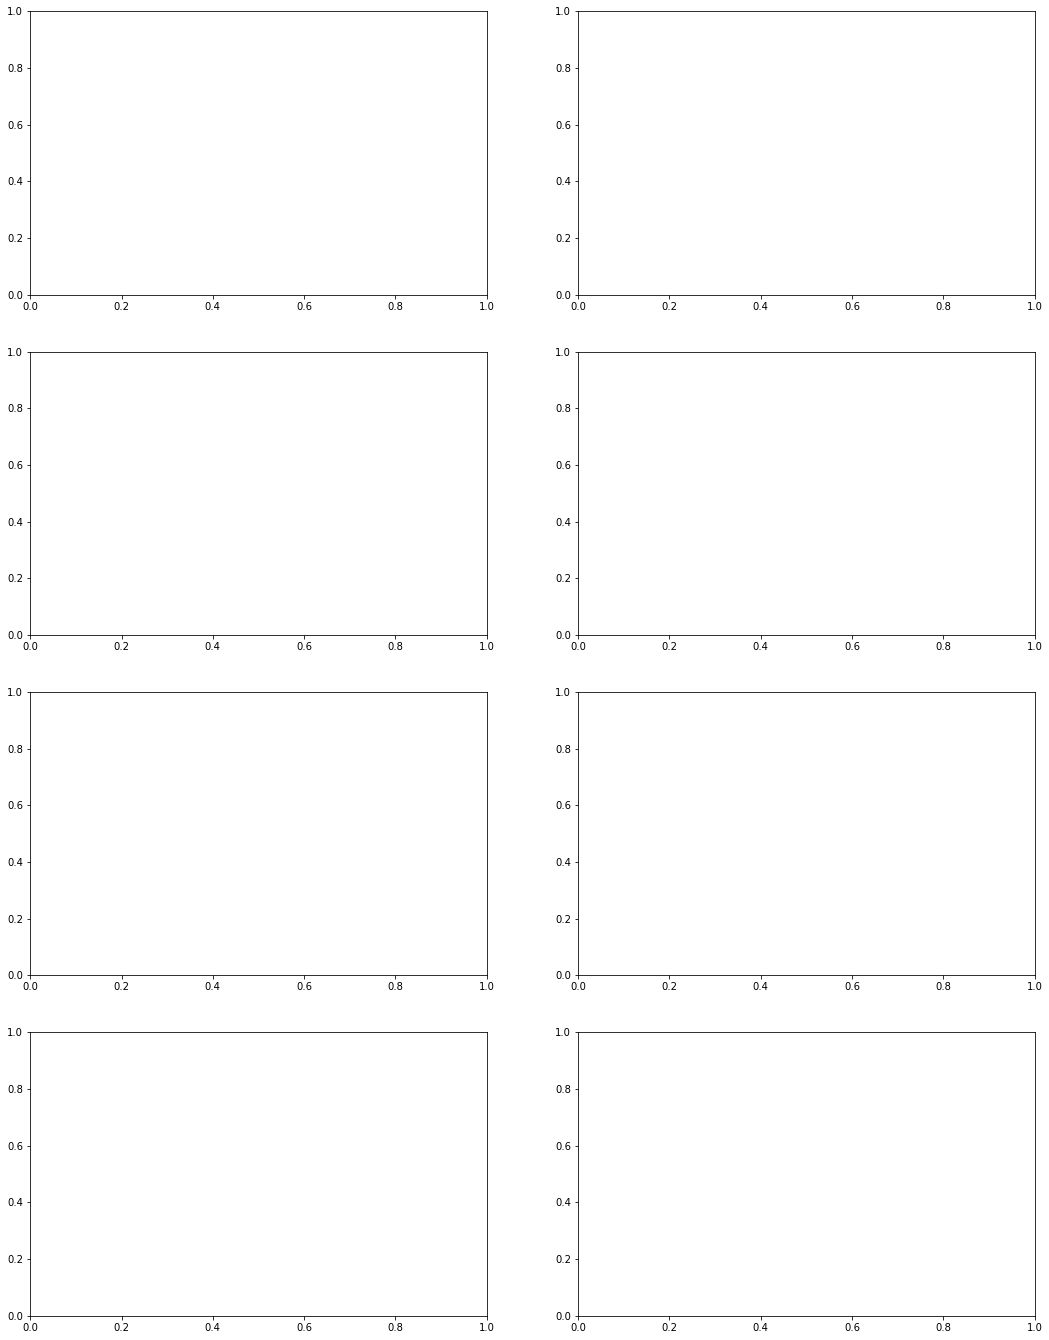

In [39]:
f, axes = plt.subplots(4, 2, figsize=(18, 24))

axes[0,0].hist(df['acousticness'])
axes[0,1].hist(df['danceability'])
axes[1,0].hist(df['energy'])
axes[1,1].hist(df['instrumentalness'])
axes[2,0].hist(df['loudness'])
axes[2,1].hist(df['liveness'])
axes[3,0].hist(df['tempo'])
axes[3,1].hist(df['valence'])

axes[0,0].set_title('Acousticness')
axes[0,1].set_title('Danceability')
axes[1,0].set_title('Energy')
axes[1,1].set_title('Instrumentalness')
axes[2,0].set_title('Loudness')
axes[2,1].set_title('Liveness')
axes[3,0].set_title('Tempo')
axes[3,1].set_title('Valence')
plt.show()

In [41]:
numeric = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'liveness', 'tempo', 'valence']
col = ['Song ID', 'total_msPlayed', 'Total Plays']+numeric

data = []
uniqueIDs = df['Song ID'].drop_duplicates().dropna()
for song in uniqueIDs:
    df_temp = df[df['Song ID']==song]
    total_ms = sum(df_temp['msPlayed'])
    data.append([song, 
                 total_ms, 
                 df_temp['SongArtist'].count(), 
                 df_temp['acousticness'].values[0],
                 df_temp['danceability'].values[0], 
                 df_temp['energy'].values[0], 
                 df_temp['instrumentalness'].values[0], 
                 df_temp['loudness'].values[0], 
                 df_temp['liveness'].values[0], 
                 df_temp['tempo'].values[0], 
                 df_temp['valence'].values[0]])

allSongs = pd.DataFrame(data, columns = col)
allSongs = allSongs.sort_values(by='total_msPlayed', ascending=False)
allSongs = allSongs.reset_index(drop=True)
allSongs.head()

KeyError: 'acousticness'

In [392]:
# allSongs['Multiple'] = np.where(allSongs['Total Plays'] > 1, True, False)
# allSongs.head()

allSongs['Rank'] = allSongs.index+1
allSongs.head()

,Song ID,total_msPlayed,Total Plays,acousticness,danceability,energy,instrumentalness,loudness,liveness,tempo,valence,Rank
0,spotify:track:7Ar4G7Ci11gpt6sfH9Cgz5,9943603,57,0.22100,0.645,0.598,0.000004,-13.180,0.0721,105.929,0.913,1
1,spotify:track:1W6txMoK3kxBkc5IttrwiA,9178160,27,0.15400,0.836,0.709,0.392000,-9.135,0.0894,145.952,0.969,2
2,spotify:track:3aqF9ZoDc2TVsEp4vmOo5A,8546834,28,0.16200,0.662,0.734,0.910000,-6.559,0.1180,98.015,0.507,3
3,spotify:track:6iX1QW1gGIVNEItnqyvFfH,8328108,30,0.74700,0.491,0.470,0.747000,-13.450,0.1280,93.964,0.846,4
4,spotify:track:2drEUEg0TYQR6dDEHkpuPE,8284138,38,0.00223,0.546,0.859,0.000947,-5.966,0.0529,99.965,0.645,5


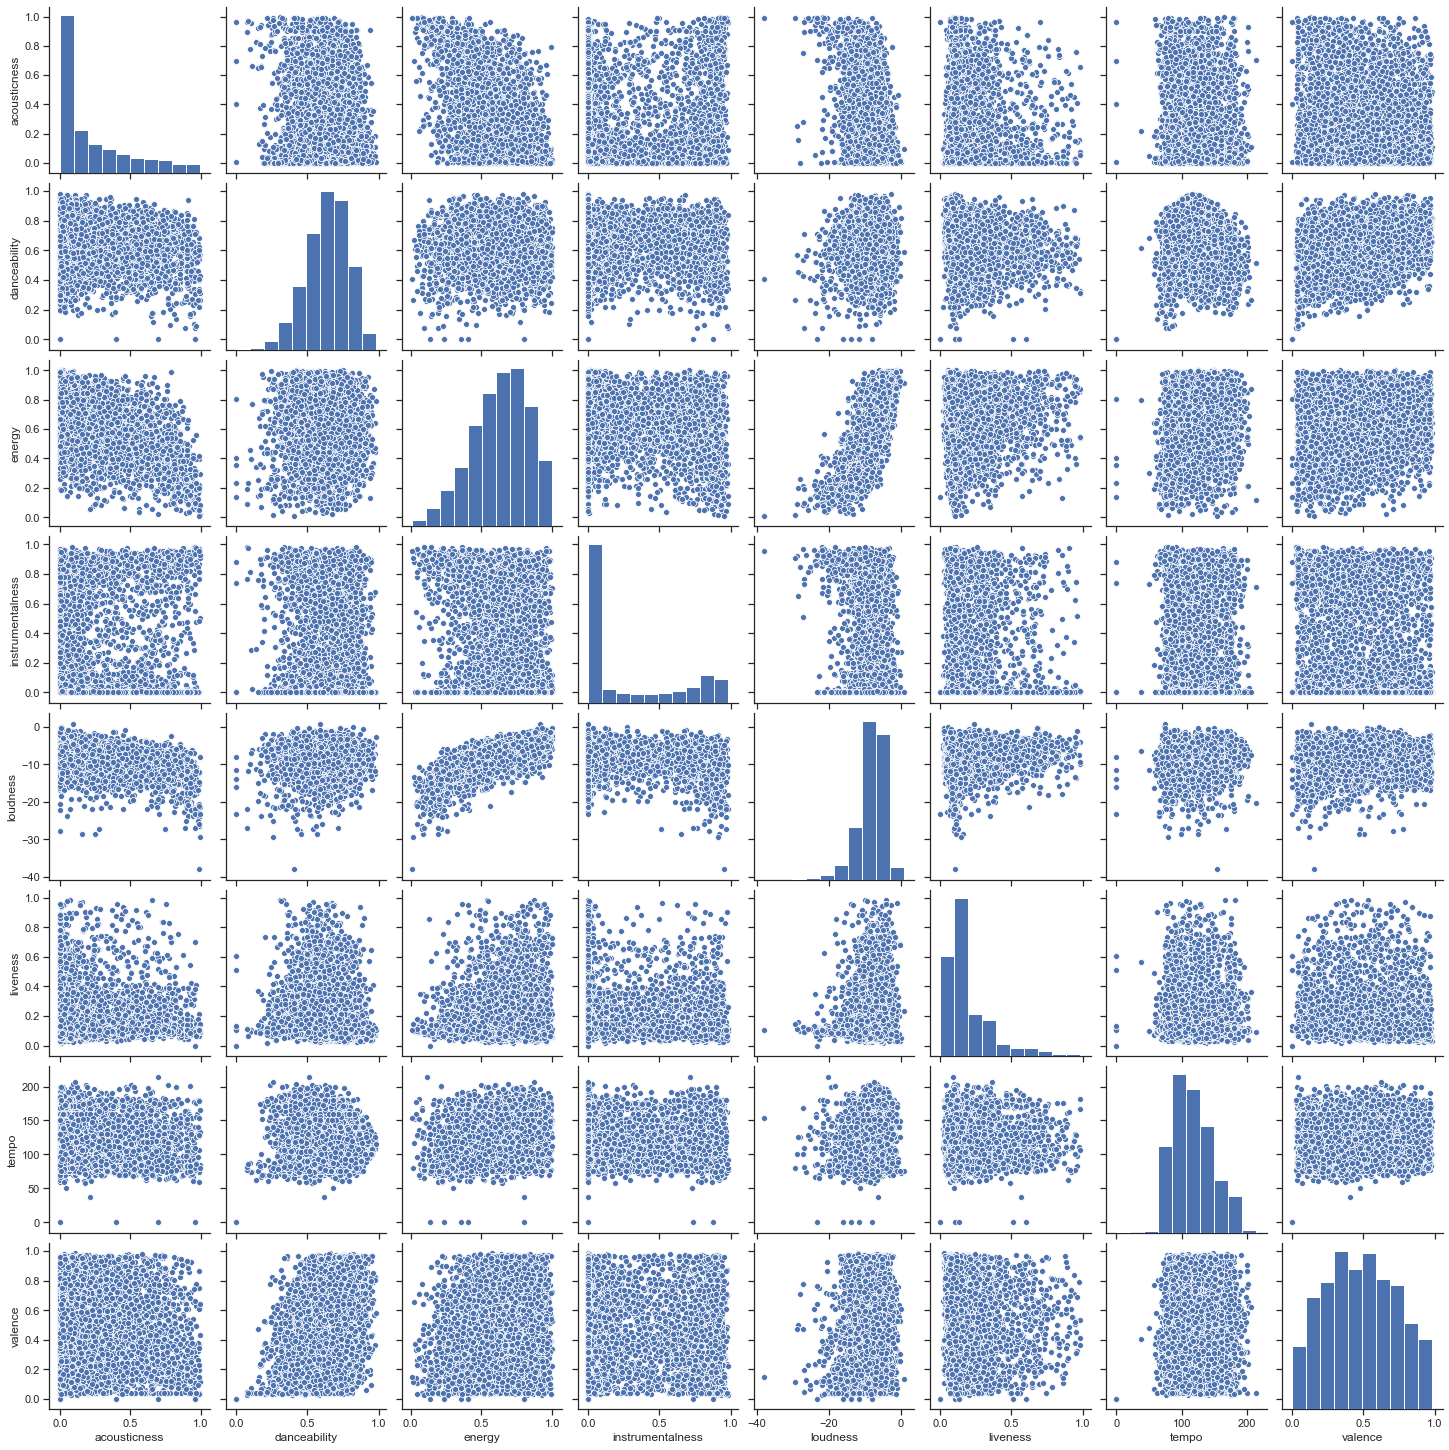

In [393]:
sns.set(style="ticks")
sns.pairplot(allSongs, vars=numeric)

In [394]:
allSongs.to_excel("allSongs.xlsx")

## TODO
- implement genre tagging for artists. this can be done through the get-artist endpoint, there is a list of genres for each artist
- create an allArtists DB similar to the allSongs one

In [396]:
result = sp.artist('spotify:artist:4iVhFmG8YCCEHANGeUUS9q')
result['genres']

['edm', 'glitch hop', 'jam band', 'jazztronica', 'livetronica']

In [403]:
data = []
uniqueIDs = df['Artist ID'].drop_duplicates().dropna()
for artist in uniqueIDs:
    result = sp.artist(artist)
    data.append([artist, result['genres']])

allArtists = pd.DataFrame(data, columns = ['Artist ID', 'Genres'])
allArtists = allArtists.reset_index(drop=True)
allArtists.head()

,Artist ID,Genres
0,spotify:artist:2FTj5ijy8lP59d2V9dHR6I,"[future bass, vapor twitch]"
1,spotify:artist:4JhjlqgMbd4RlrT81VoTIF,"[chillhop, new french touch]"
2,spotify:artist:0PxzGnCYBpSuaI49OR94cA,"[electropop, tropical house, vapor soul, vapor..."
3,spotify:artist:4V8LLVI7PbaPR0K2TGSxFF,"[hip hop, rap]"
4,spotify:artist:7o7mC95EDbJKTcPAAs8C3r,"[edm, electropop, vapor twitch]"


In [405]:
allArtists.to_excel("allArtists.xlsx")

In [409]:
genre_list = []
for index, row in allArtists.iterrows():
    genre_list += row['Genres']

print(len(genre_list))
genre_list = list(dict.fromkeys(genre_list))
print(len(genre_list))
genre_list

7074
854


['future bass',
 'vapor twitch',
 'chillhop',
 'new french touch',
 'electropop',
 'tropical house',
 'vapor soul',
 'hip hop',
 'rap',
 'edm',
 'big room',
 'brostep',
 'dance pop',
 'electro house',
 'electronic trap',
 'house',
 'moombahton',
 'pop',
 'pop dance',
 'lo-fi beats',
 'cali rap',
 'oakland hip hop',
 'scam rap',
 'trap soul',
 'underground hip hop',
 'vapor trap',
 'album rock',
 'blues rock',
 'classic rock',
 'country rock',
 'folk rock',
 'hard rock',
 'heartland rock',
 'mellow gold',
 'psychedelic rock',
 'rock',
 'roots rock',
 'soft rock',
 'southern rock',
 'art rock',
 'british invasion',
 'bass trap',
 'dubstep',
 'filthstep',
 'pop edm',
 'traprun',
 'glitch',
 'glitch hop',
 'indietronica',
 'atl hip hop',
 'dirty south rap',
 'gangster rap',
 'pop rap',
 'southern hip hop',
 'trap',
 'canadian electronic',
 'progressive house',
 'jam band',
 'alternative hip hop',
 'detroit hip hop',
 'escape room',
 'jazz boom bap',
 'contemporary country',
 'baton rouge r

In [412]:
allData = df.merge(allArtists, on='Artist ID')
allData.head()

,endTime,artistName,trackName,msPlayed,year,month,hour,SongArtist,Song Length,Song Popularity,...,Album ID,acousticness,danceability,energy,instrumentalness,loudness,liveness,tempo,valence,Genres
0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19,Room to Breathe ... CharlestheFirst,170909.0,37.0,...,spotify:album:5sSo1n6byaLi272WDH0rbU,0.807,0.742,0.318,0.717,-12.405,0.1110,132.002,0.105,"[future bass, vapor twitch]"
1,2019-10-21 13:56:00,CharlestheFirst,Consumed,27274,2019,10,13,Consumed ... CharlestheFirst,237419.0,31.0,...,spotify:album:0mUmq8e20rYkJ7oTuPnS0W,0.213,0.455,0.610,0.750,-9.157,0.1430,93.166,0.361,"[future bass, vapor twitch]"
2,2019-10-22 15:56:00,CharlestheFirst,Love & Enemies,896,2019,10,15,Love & Enemies ... CharlestheFirst,204000.0,28.0,...,spotify:album:1RijqdNciAIlGP7UIKY9Sv,0.233,0.623,0.498,0.198,-9.835,0.0712,139.647,0.302,"[future bass, vapor twitch]"
3,2019-12-01 13:42:00,CharlestheFirst,Ebb and Flow,234116,2019,12,13,Ebb and Flow ... CharlestheFirst,234116.0,28.0,...,spotify:album:3A22s73xiBnXxXxFizvphW,0.481,0.704,0.404,0.118,-8.032,0.5360,180.351,0.560,"[future bass, vapor twitch]"
4,2019-12-12 21:11:00,CharlestheFirst,Step / Time,185908,2019,12,21,Step / Time ... CharlestheFirst,185908.0,47.0,...,spotify:album:2E39UZ99Gh3IDycCVoHVXU,0.777,0.807,0.341,0.108,-8.693,0.1260,132.003,0.210,"[future bass, vapor twitch]"


In [415]:
data = []
for genre in genre_list:
    count = 0
    totalMS = 0
    for index, row in allData.iterrows():
        if genre in row['Genres']:
            count += 1
            totalMS = row['msPlayed']
    data.append([genre, count, totalMS])

allGenres = pd.DataFrame(data, columns=['Genre', 'Count', 'msPlayed'])
allGenres = allGenres.sort_values(by='msPlayed', ascending=False)
allGenres.head()

,Genre,Count,msPlayed
444,instrumental stoner rock,1,724658
498,philly indie,27,570733
546,street band,1,533000
544,brass band,1,533000
545,second line,1,533000


In [431]:
for genre in ['chillhop']:
    count = 0
    totalMS = 0
    for index, row in allData.iterrows():
        if genre in row['Genres']:
            count += 1
            totalMS = row['msPlayed']
    data.append([genre, count, totalMS])

chop = pd.DataFrame(data, columns=['Genre', 'Count', 'msPlayed'])
chop = chop.sort_values(by='msPlayed', ascending=False)
chop.head()

,Genre,Count,msPlayed
444,instrumental stoner rock,1,724658
498,philly indie,27,570733
546,street band,1,533000
544,brass band,1,533000
545,second line,1,533000


In [423]:
allData.head()

,endTime,artistName,trackName,msPlayed,year,month,hour,SongArtist,Song Length,Song Popularity,...,Album ID,acousticness,danceability,energy,instrumentalness,loudness,liveness,tempo,valence,Genres
0,2019-10-10 19:04:00,CharlestheFirst,Room to Breathe,170909,2019,10,19,Room to Breathe ... CharlestheFirst,170909.0,37.0,...,spotify:album:5sSo1n6byaLi272WDH0rbU,0.807,0.742,0.318,0.717,-12.405,0.1110,132.002,0.105,"[future bass, vapor twitch]"
1,2019-10-21 13:56:00,CharlestheFirst,Consumed,27274,2019,10,13,Consumed ... CharlestheFirst,237419.0,31.0,...,spotify:album:0mUmq8e20rYkJ7oTuPnS0W,0.213,0.455,0.610,0.750,-9.157,0.1430,93.166,0.361,"[future bass, vapor twitch]"
2,2019-10-22 15:56:00,CharlestheFirst,Love & Enemies,896,2019,10,15,Love & Enemies ... CharlestheFirst,204000.0,28.0,...,spotify:album:1RijqdNciAIlGP7UIKY9Sv,0.233,0.623,0.498,0.198,-9.835,0.0712,139.647,0.302,"[future bass, vapor twitch]"
3,2019-12-01 13:42:00,CharlestheFirst,Ebb and Flow,234116,2019,12,13,Ebb and Flow ... CharlestheFirst,234116.0,28.0,...,spotify:album:3A22s73xiBnXxXxFizvphW,0.481,0.704,0.404,0.118,-8.032,0.5360,180.351,0.560,"[future bass, vapor twitch]"
4,2019-12-12 21:11:00,CharlestheFirst,Step / Time,185908,2019,12,21,Step / Time ... CharlestheFirst,185908.0,47.0,...,spotify:album:2E39UZ99Gh3IDycCVoHVXU,0.777,0.807,0.341,0.108,-8.693,0.1260,132.003,0.210,"[future bass, vapor twitch]"


In [427]:
if 'chillhop' in ['chillhop', 'lo-fi beats']:
    print('nice')

nice


In [439]:
for index, row in allData.iterrows():
    if 'chillhop' in row['Genres']:
        print(row['Genres'])

['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop', 'new french touch']
['chillhop

['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi 

['chillhop', 'japanese chillhop', 'lo-fi beats', 'phonk']
['chillhop', 'japanese chillhop', 'lo-fi beats', 'phonk']
['chillhop', 'japanese chillhop', 'lo-fi beats', 'phonk']
['chillhop', 'japanese chillhop', 'lo-fi beats', 'phonk']
['chillhop', 'japanese chillhop', 'lo-fi beats', 'phonk']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillhop']
['chillh

['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'jazz boom bap', 'lo-fi beats']
['chillhop', 'jazz boom bap', 'lo-fi beats']
['chillhop', 'jazz boom bap', 'lo-fi beats']
['chillhop', 'jazz boom bap', 'lo-fi beats']
['chillhop', 'jazz boom bap', 'lo-fi beats']
['chillhop', 'jazz boom bap', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop', 'lo-fi beats']
['chillhop']
['chillhop']
['chillhop']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'jazz boom bap']
['chillhop', 'lo-fi beats', 'phonk']
['chillhop', 'lo-fi beats', 'phonk']
['chillhop'